# Ford GoBike Data Exploration
## by Naif Alsofyani

## Investigation Overview

> This exploration and visualization project focuses on finding the bike usage pattern and customer habit characteristics for February ride trips data in 2019.

## Dataset Overview

> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously know as Ford GoBike) is a regional public bike-sharing system in the San Francisco Bay Area. And it is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established in 2013, and after the acquisition by [Lyft](https://en.wikipedia.org/wiki/Lyft), the system is expected to have 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [42]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_file.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User Types

> Most users are subscribers

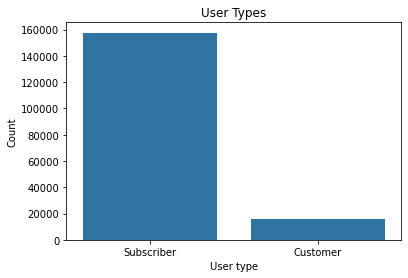

In [43]:
sb.countplot(data=df_clean, x='user_type', color = sb.color_palette()[0]);
plt.xlabel('User type');
plt.title('User Types')
plt.ylabel('Count');

## Distribution Of User Ages

> Most useres are between the age of 25-40

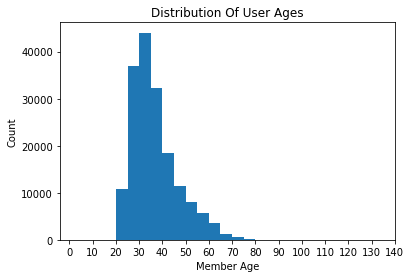

In [44]:
bins = np.arange(0, df_clean['member_age'].max()+5, 5)
ticks = np.arange(0,150,10)
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.title('Distribution Of User Ages')
plt.xticks(ticks);
plt.xlabel('Member Age');
plt.ylabel('Count');

## Users Trip Duration
>Most users took between 5 to 10 minutes ride.

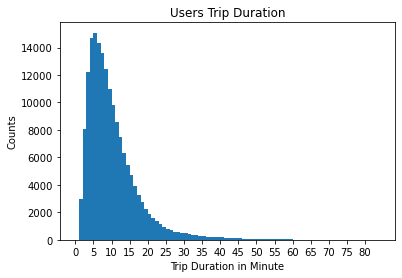

In [45]:
bins = np.arange(0, 85, 1)
ticks = np.arange(0, 85, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bins);
plt.title('Users Trip Duration')
plt.xticks(ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Counts');

## User Trips By Days
> Most useres start their trips on workdays

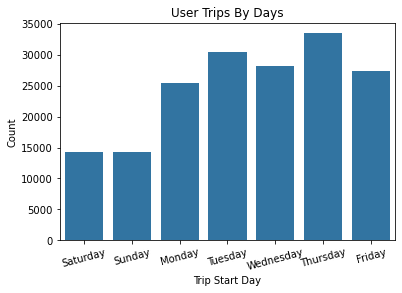

In [46]:
order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(data=df_clean, x='start_day_of_week',order = order, color = sb.color_palette()[0]);
plt.xticks(rotation=15)
plt.title('User Trips By Days')
plt.xlabel('Trip Start Day');
plt.ylabel('Count');

## User Trips By Hours
> Most Trips are between 8 AM-9 AM and 5 PM-6 PM

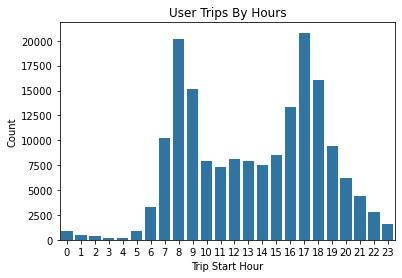

In [47]:
sb.countplot(data=df_clean, x='start_hour_of_day', color = sb.color_palette()[0]);
plt.xlabel('Trip Start Hour');
plt.title('User Trips By Hours')
plt.ylabel('Count');

## User Age Vs Trip Duration
> In general, older people take less trip duration than younger ones.

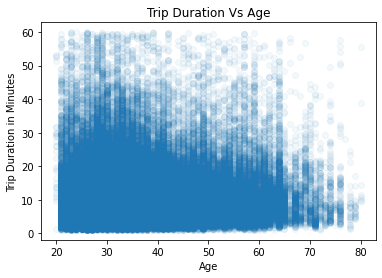

In [48]:
plt.scatter(df_clean['member_age'], df_clean['duration_minute'], alpha = 0.05)
plt.title('Trip Duration Vs Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes')
plt.show()

## User Type Vs Trip Duration
> Although more than 50% of customers taking longer trips than most subscribers, they don't use it as often as subscribers do.

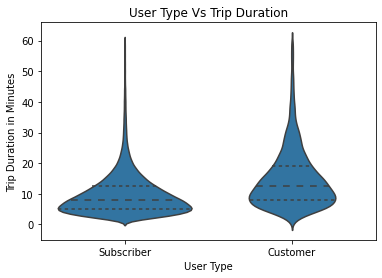

In [49]:
sb.violinplot(data=df_clean, x='user_type', y='duration_minute', color=sb.color_palette()[0], inner='quartile');
plt.title('User Type Vs Trip Duration')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minutes');

## Users Age Vs Daily Usage
> Users who rented the bikes through workdays are slightly older than those who rented on weekends.

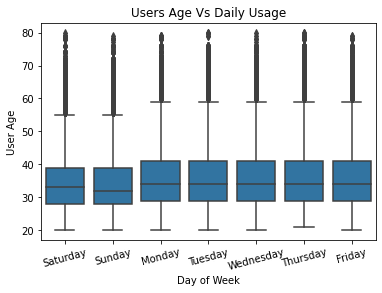

In [50]:
order =['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.boxplot(data=df_clean, x='start_day_of_week', y='member_age',order=order, color=sb.color_palette()[0]);
plt.title('Users Age Vs Daily Usage')
plt.xticks(rotation=15)
plt.xlabel('Day of Week');
plt.ylabel('User Age');

## Users Type Vs Daily Usage
> Customers are renting bikes on weekends slightly more than they do on workdays.

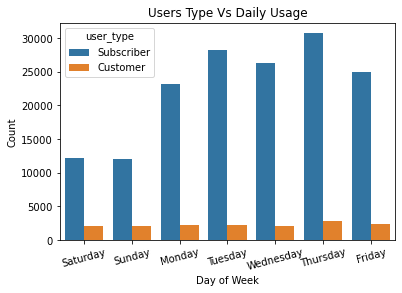

In [51]:
order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(data=df_clean, x='start_day_of_week', hue='user_type', order=order)
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.title('Users Type Vs Daily Usage')
plt.ylabel('Count');

## Users Gender Vs Trips Duration
> Males tend to have shorter trips observed by a Smaller median and shorter IQR. Though, it is not that big of a difference.

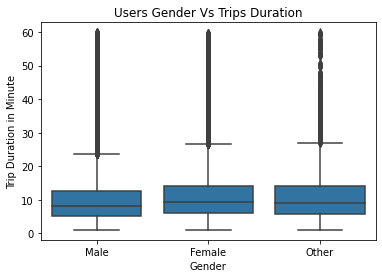

In [52]:
sb.boxplot(data=df_clean, x='member_gender', y='duration_minute', color=sb.color_palette()[0]);
plt.xlabel('Gender');
plt.title('Users Gender Vs Trips Duration')
plt.ylabel('Trip Duration in Minute');

## All Users Trip Duration On Weekdays 
> Subscribers are taking much shorter rides compared to customers on workdays. Both Customers and subscribers have a noticeable increase in trip duration over the weekends, especially for customers.

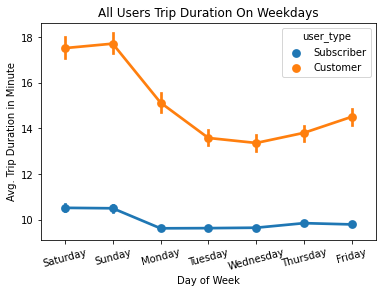

In [53]:
order = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.pointplot(data=df_clean, x='start_day_of_week', y='duration_minute', hue='user_type', order=order)
plt.title('All Users Trip Duration On Weekdays')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Avg. Trip Duration in Minute');

## Key Findings 
>Subscribers tend to use the service more than customers do. The riding habit varies between subscribers and customers.
>
> There are two patterns found:

1- The short ride duration for subscribers on workdays during work hours showed a pattern that they tend to take bikes for work

2- The other pattern of customer use shows that they're taking advantage of the bike-sharing system quite different from the subscribers, longer times and more rides on weekends, for having fun rides around the city probably.

## Thanks For Reading !

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!